# <center>  Compute Technical Indicators for Predicting Stock Prices
    
Technical analysis for predicting stock prices considers price and volume in the stock data. Historical price and volume values are used to compute statistics, known as indicators. These indicators are the features on which we will later train our machine learning model, for predicting future stock prices.

## <font color = 'blue'> Get the data

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np

import pandas as pd
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
import matplotlib.pyplot as plt
yf.pdr_override()

from pylab import rcParams
rcParams['figure.figsize'] = (10,8)

In [4]:
# Use Python module fix_yahoo_finance to get historical stock data

print("Nasdaq Inc. stock data from 2002 to 2017")
df = pdr.get_data_yahoo("NDAQ", start="2002-01-01", end="2017-06-09")  #DataFrame
df.head()

Nasdaq Inc. stock data from 2002 to 2017
[*********************100%***********************]  1 of 1 downloaded

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-07-01,15.0,15.0,15.0,15.00,13.627940,1300
2002-07-02,15.5,16.5,15.0,15.13,13.746048,7000
2002-07-03,14.0,16.0,14.0,15.00,13.627940,10200
2002-07-05,15.0,15.0,15.0,15.00,13.627940,500
2002-07-08,14.0,14.0,14.0,14.00,12.719411,300


In [5]:
print("DataFrame shape:", df.shape[0], "entries and", df.shape[1], "columns")

DataFrame shape: 3763 entries and 6 columns


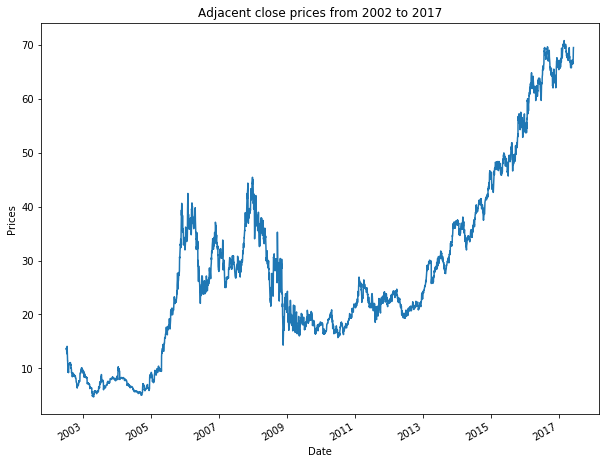

In [6]:
# Consider only the adjacent close prices for computing indicators

df_prices = df['Adj Close'] #read only the column and omit indices

ax = df_prices.plot(title = 'Adjacent close prices from 2002 to 2017', use_index = True)
ax.set_xlabel('Date')
ax.set_ylabel('Prices')
plt.show()

## <font color = 'blue'> Indicator 1: Rolling mean (or Simple Moving Average- SMA)
     We compute mean over a window- for e.g. if we consider a window of 10 days, we compute mean over the past 10 days. Then we move the window forward and compute mean for the past 10 days and so on. This new line somewhat follows the prices, but it lags a little bit. Technical analysts look for points where price crosse the SMA. For e.g., if the price dips below the SMA and there is significant deviation from the SMA, followed by the return of price to SMA line, that lowest point might indicate a buying opportunity. 

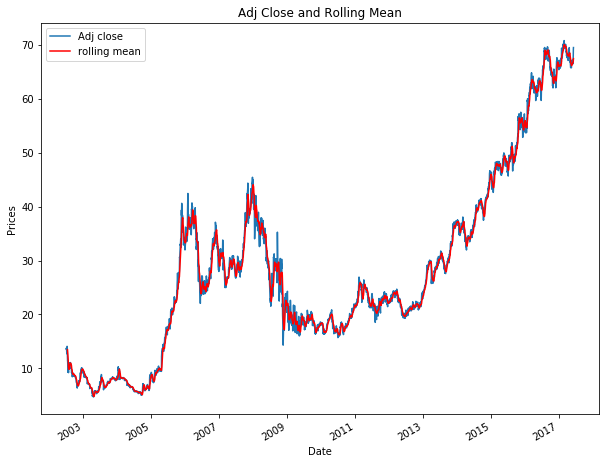

In [7]:
ax = df_prices.plot(title = 'Adj Close and Rolling Mean', label = 'Adj close')

roll_mean = pd.rolling_mean(df_prices, window = 10)   # rolling mean over a window of 10 days
roll_mean.plot(label = 'rolling mean', ax = ax, c = 'red', use_index = True)

ax.legend(loc = 'upper left')
ax.set_xlabel('Date')
ax.set_ylabel('Prices')
plt.show()

## <font color = 'blue'> Indicator 2: Bollinger Bands
    Continued from explanation of mean: when is the deviation of price from SMA significant enough to suggest a buy/sell opportunity? We look at the recent volatility of the stock. If it is very volatile, we discard movements above and below the mean. Upper and lower bollinger bands are bands two standard deviations above and below the mean respectively. 
    
    When we see excursions 2*sigma away from the mean, we should pay attention. For e.g., if the price drops below lowe band, and then up back through it, that is a buy signal because the price has gone quite far from the SMA and we are moving back towards it. So if we buy at that point, we can anticipate positive returns as the price climbs back through the average. 
    
    Likewise, if the price shoots above upper band, and then go back down through, that is potentially a sell signal. Thes bands follow the movement of prices and are less spikey.

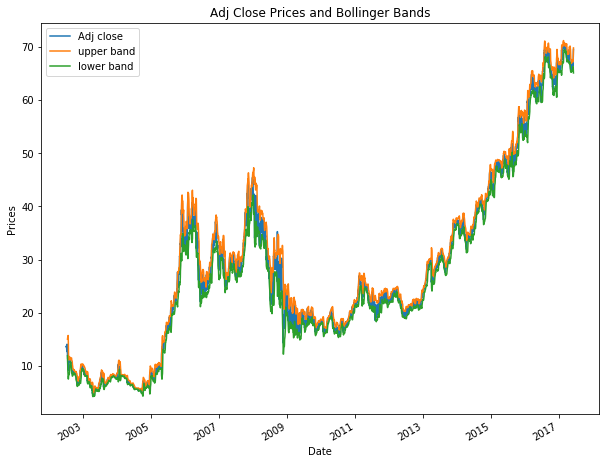

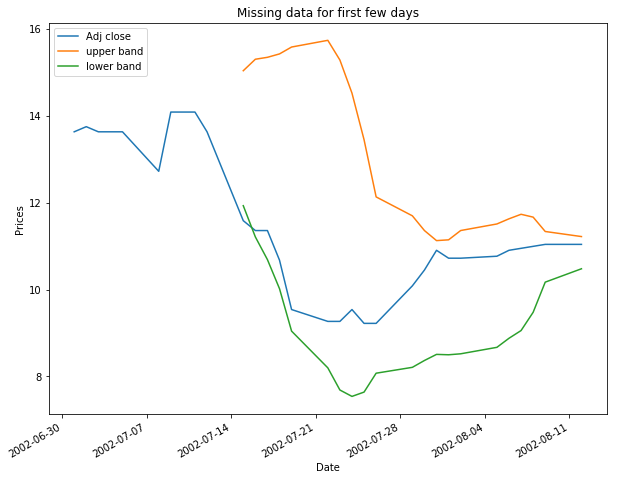

In [8]:
roll_std = pd.rolling_std(df_prices, window = 10) #rolling standard deviation

upper_band = roll_mean + 2*roll_std
lower_band = roll_mean - 2*roll_std

# We have missing values for the first w days, where w = the window we specify. 

ax = df_prices.plot(title = 'Adj Close Prices and Bollinger Bands', label = 'Adj close' )

upper_band.plot(label = 'upper band', ax = ax)
lower_band.plot(label = 'lower band', ax = ax)

ax.legend(loc = 'upper left')
ax.set_xlabel('Date')
ax.set_ylabel('Prices')
plt.show()

ax1 = df_prices[:30].plot(title = 'Missing data for first few days', label = 'Adj close' )

upper_band[:30].plot(label = 'upper band', ax = ax1)
lower_band[:30].plot(label = 'lower band', ax = ax1)

ax1.legend(loc = 'upper left')
ax1.set_xlabel('Date')
ax1.set_ylabel('Prices')
plt.show()

## <font color = 'blue'> Indicator 3: Daily returns 
     - one of the most important statistics used in financial analysis. 
     Daily return means how much the price went up or down on a particular day. 
     Daily return on day t: DT[t] = (price[t]/ price[t-1]) - 1
                                    (today's price / yesterday's price) - 1
     For e.g., 0.1 means that the price went up by 10%. 
This technical indicator is useful for comparing two stocks, such as how sp500 moves as compared to Apple. 

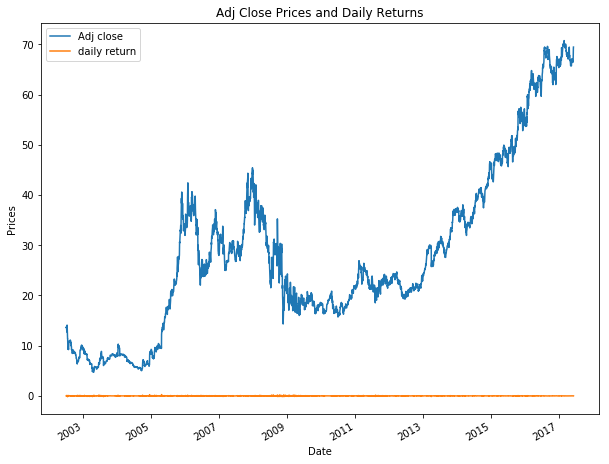

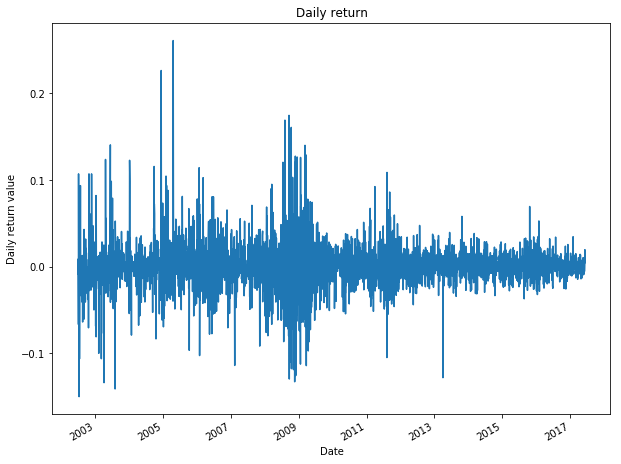

In [9]:
daily_ret = df_prices.copy()
daily_ret[1:] = (df_prices[1:] / df_prices[:-1].values) - 1
daily_ret.ix[0] = 0  #set daily return at row 0 to 0

ax = df_prices.plot(title = 'Adj Close Prices and Daily Returns', label = 'Adj close')

daily_ret.plot(label = 'daily return', ax = ax)

ax.legend(loc = 'upper left')
ax.set_xlabel('Date')
ax.set_ylabel('Prices')
plt.show()

ax1 = daily_ret.plot(title = 'Daily return')
ax1.set_ylabel('Daily return value')
plt.show()


## <font color = 'blue'> Indicator 4: Cumulative return
    Cumulative return at day t: CR[t] = (price[t] / price[0]) - 1
                                        (price today / price in the beginning) - 1
A cumulative return is the aggregate amount an investment has gained or lost over time, independent of the period of time involved. 

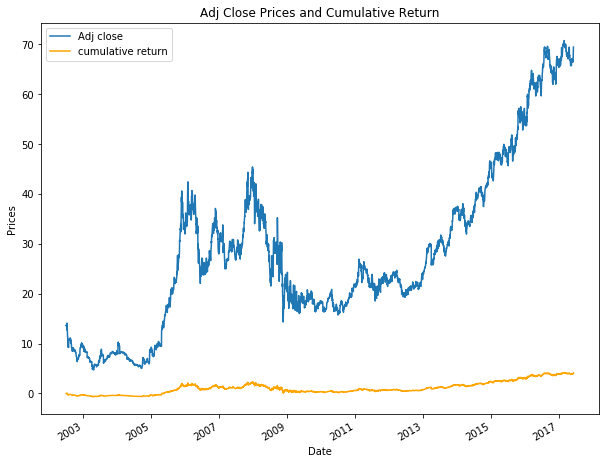

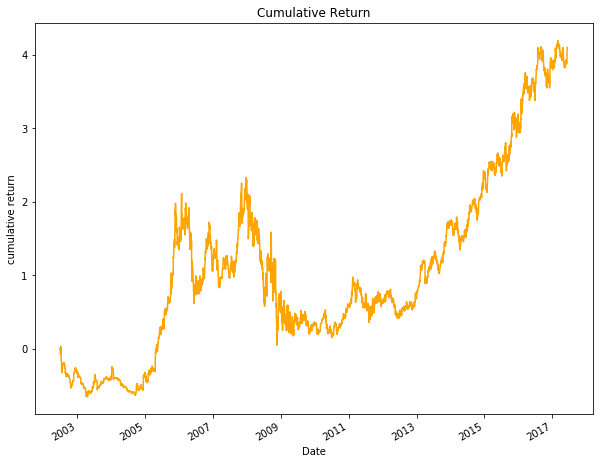

In [10]:
cum_ret = df_prices.copy()
cum_ret[1:] = (df_prices[1:] / df_prices[0]) - 1
cum_ret.ix[0] = 0

ax = df_prices.plot(title = 'Adj Close Prices and Cumulative Return', label = 'Adj close')

cum_ret.plot(label = 'cumulative return', ax = ax, c = 'orange')

ax.legend(loc = 'upper left')
ax.set_xlabel('Date')
ax.set_ylabel('Prices')
plt.show()

ax1 = cum_ret.plot(title = 'Cumulative Return', c = 'orange')
ax1.set_ylabel('cumulative return')
plt.show()

## <font color = 'blue'> Indicator 5: Momentum
    - amount of price change over some number of days
    we compute n days of momentum; momentum on day t: momen[t] = price[t] / price[t - n] - 1
                                                            (price on day t) / (price n days earlier) - 1
    for e.g., momentum = 0.1 => the price went up by 10%; -0.1 => it went down by 10%

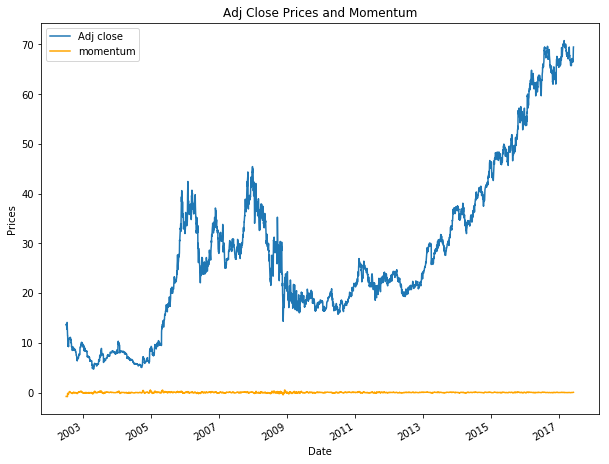

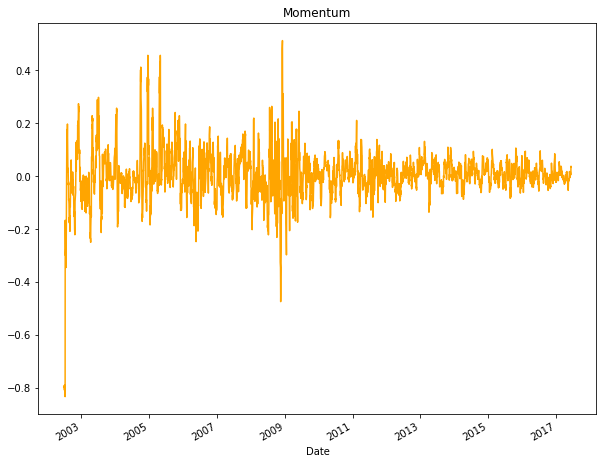

In [11]:
momentum_ = []
for i in range(len(df_prices)):
    momentum_.append((df_prices[i] / df_prices[i-10]) - 1)

momentum = pd.Series(data = momentum_, index = df_prices.index)

ax = df_prices.plot(title = 'Adj Close Prices and Momentum', label = 'Adj close')
momentum.plot(label = 'momentum', ax = ax,  c = 'orange')

ax.legend(loc = 'upper left')
ax.set_xlabel('Date')
ax.set_ylabel('Prices')
plt.show()

momentum.plot(title = "Momentum", c = 'orange')
plt.show()

## <font color = 'blue'> Indicator 6: Stochastic oscillator
    
The stochastic oscillator is a momentum indicator comparing the closing price of a security to the range of its prices over a certain period of time. 

Stochastic Osc. = (Current close - L) (H - L)

L = lowest of past w days, where w = window and H = highest of past w days in the window

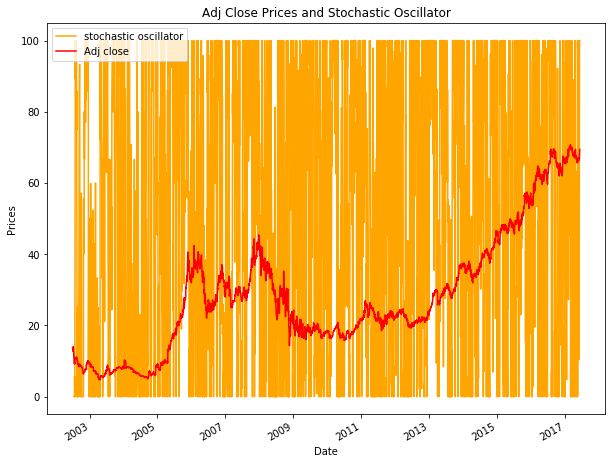

In [12]:
low = pd.DataFrame.rolling(df_prices, 10).min()
#low of the previous 10 trading sessions

high = pd.DataFrame.rolling(df_prices, 10).max()
#highest price traded during that same session

stoch_osc = 100 * (df_prices - low) / (high - low)

ax = stoch_osc.plot(title = 'Adj Close Prices and Stochastic Oscillator',
                    label = 'stochastic oscillator', c = 'orange')
df_prices.plot( label = 'Adj close', c = 'red', ax = ax)

ax.legend(loc = 'upper left')
ax.set_xlabel('Date')
ax.set_ylabel('Prices')
plt.show()

## <font color = 'blue'> Form and store the final DataFrame

In [13]:
momentum = momentum.to_frame('momentum')
cum_ret = cum_ret.to_frame('cumulative ret')
roll_mean = roll_mean.to_frame('roll_mean')
bands = pd.concat([upper_band, lower_band], axis = 1)
bands.columns = ['band1', 'band2']

#Add rolling standard deviation also as an indicator
roll_std = roll_std.to_frame('roll_std')

daily_ret = daily_ret.to_frame('daily_ret')
stoch_osc = stoch_osc.to_frame('stochastic osc')

# For every day, the price that our machine learning model should predict is the Adj Close price of the next day
df_predict = df_prices.shift(-1)
# df_predict.rename(columns={'Adj Close':'Close Predict'}, inplace=True)
df_predict = df_predict.to_frame('Close Predict')

data = pd.concat([df[['Close', 'Adj Close']],roll_mean, bands, daily_ret, cum_ret, roll_std, 
                 momentum, stoch_osc, df_predict], axis = 1)

print("Final data with all indicators: ")
print(data.shape, "-", data.shape[0], "entries and", data.shape[1], "features")
print()
data.head(15)

Final data with all indicators: 
(3763, 11) - 3763 entries and 11 features



,Close,Adj Close,roll_mean,band1,band2,daily_ret,cumulative ret,roll_std,momentum,stochastic osc,Close Predict
Date,,,,,,,,,,,
2002-07-01,15.00,13.627940,NaN,NaN,NaN,0.000000,0.000000,NaN,-0.795235,NaN,13.746048
2002-07-02,15.13,13.746048,NaN,NaN,NaN,0.008667,0.008667,NaN,-0.792970,NaN,13.627940
2002-07-03,15.00,13.627940,NaN,NaN,NaN,-0.008592,0.000000,NaN,-0.795447,NaN,13.627940
2002-07-05,15.00,13.627940,NaN,NaN,NaN,0.000000,0.000000,NaN,-0.796110,NaN,12.719411
2002-07-08,14.00,12.719411,NaN,NaN,NaN,-0.066667,-0.066667,NaN,-0.808660,NaN,14.082206
2002-07-09,15.50,14.082206,NaN,NaN,NaN,0.107143,0.033333,NaN,-0.789314,NaN,14.082206
2002-07-10,15.50,14.082206,NaN,NaN,NaN,0.000000,0.033333,NaN,-0.790517,NaN,14.082206
2002-07-11,15.50,14.082206,NaN,NaN,NaN,0.000000,0.033333,NaN,-0.794551,NaN,13.627940
2002-07-12,15.00,13.627940,NaN,NaN,NaN,-0.032258,0.000000,NaN,-0.802905,NaN,11.583749


In [14]:
data.to_csv('NasdaqInc_stockdata_features.csv', index = True)